In [9]:
import pandas as pd

# Load the dataset
file_path = './MTA_Subway_Hourly_Ridership__20234611.csv'
mta_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
mta_df.head()

,transit_timestamp,payment_method,fare_class_category,ridership,transfers
0,07/12/2023 17:00,metrocard,Metrocard - Fair Fare,298,3
1,07/12/2023 17:00,metrocard,Metrocard - Other,644,0
2,07/12/2023 17:00,metrocard,Metrocard - Full Fare,3265,13
3,07/12/2023 17:00,metrocard,Metrocard - Seniors & Disability,383,13
4,07/12/2023 17:00,metrocard,Metrocard - Students,37,0


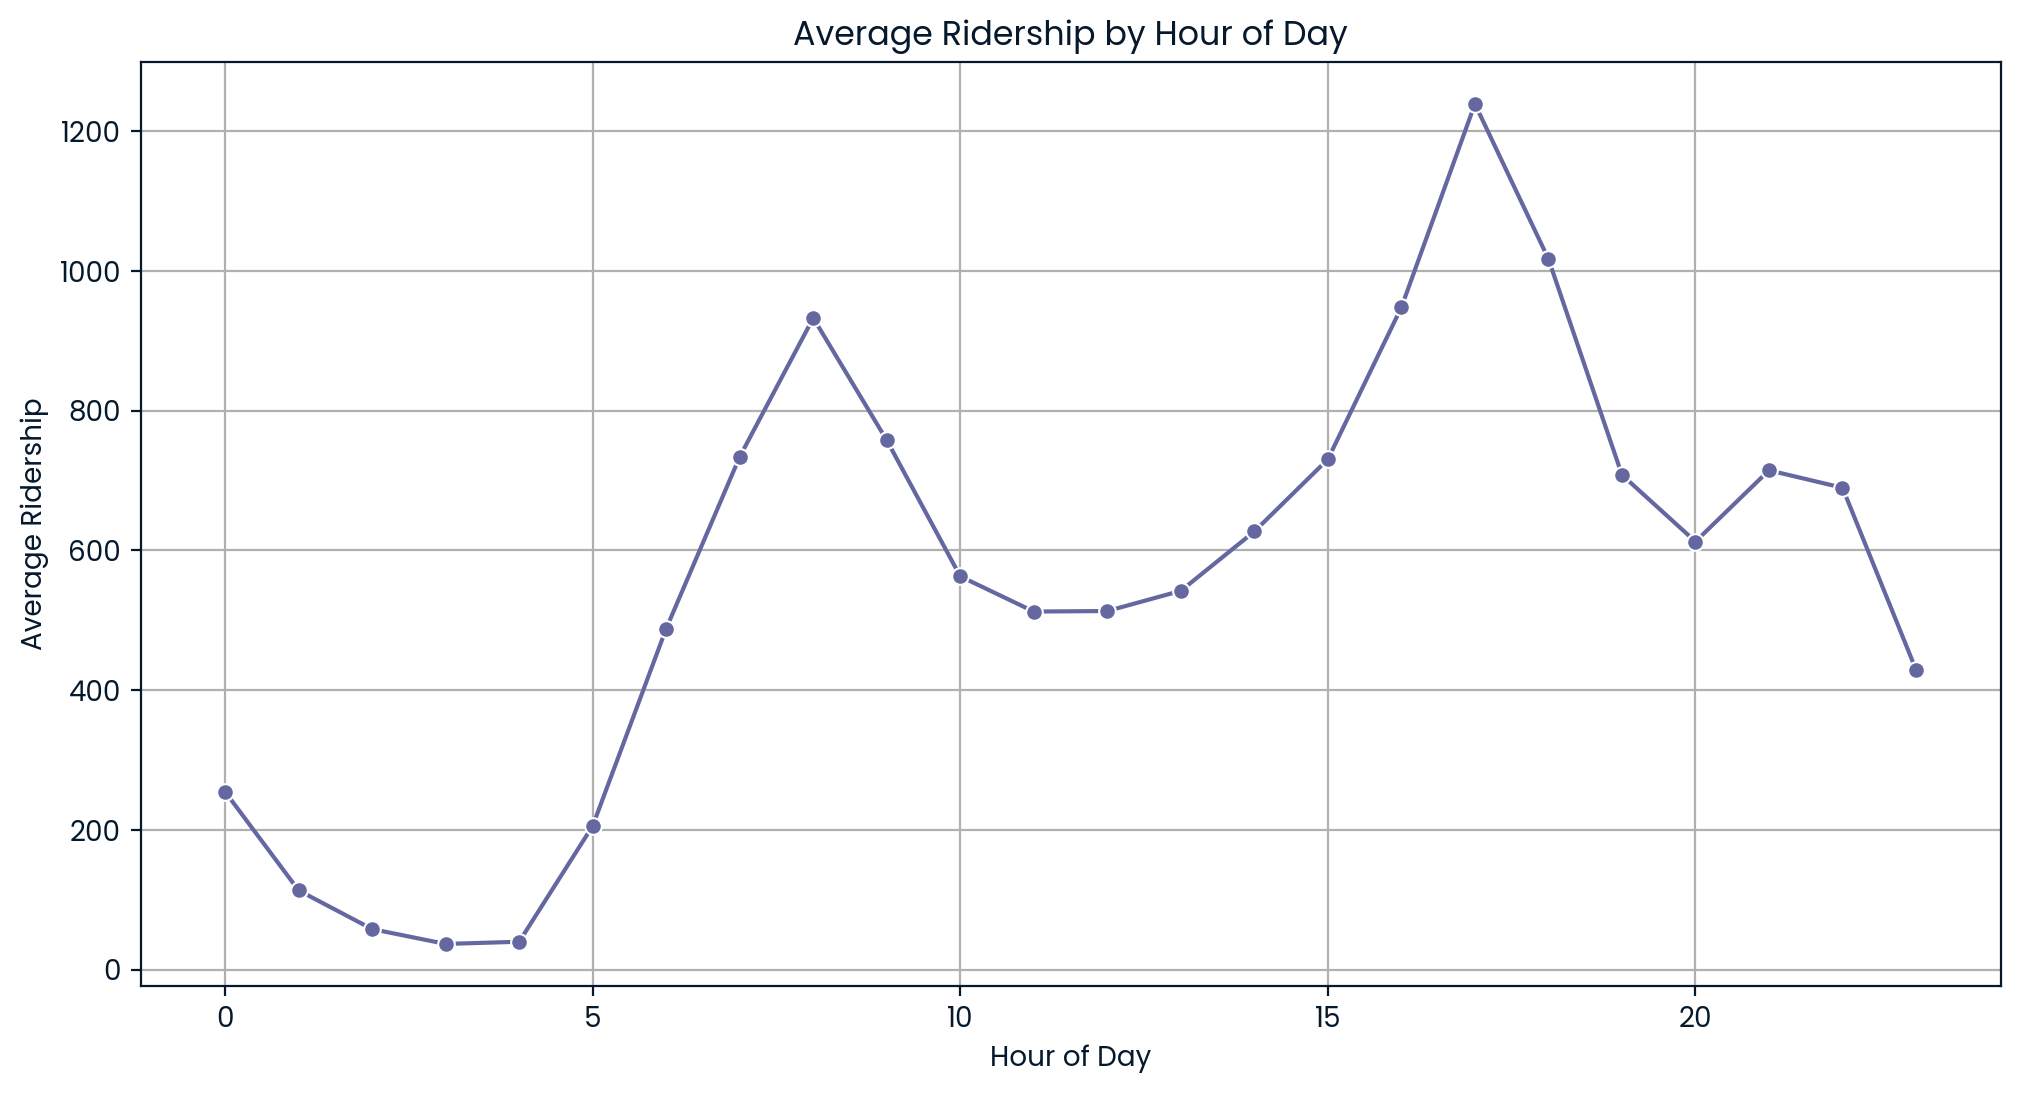

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'transit_timestamp' to datetime format
mta_df['transit_timestamp'] = pd.to_datetime(mta_df['transit_timestamp'])

# Extract the hour from the timestamp
mta_df['hour'] = mta_df['transit_timestamp'].dt.hour

# Group by hour and calculate the mean ridership
hourly_ridership = mta_df.groupby('hour')['ridership'].mean().reset_index()

# Plot the mean ridership by hour
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_ridership, x='hour', y='ridership', marker='o')
plt.title('Average Ridership by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Ridership')
plt.grid(True)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data
X = mta_df[['hour']]
y = mta_df['ridership']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 1095033.2167513878
Root Mean Squared Error (RMSE): 1046.4383482801975
R-squared (R2): 0.031063346579299544


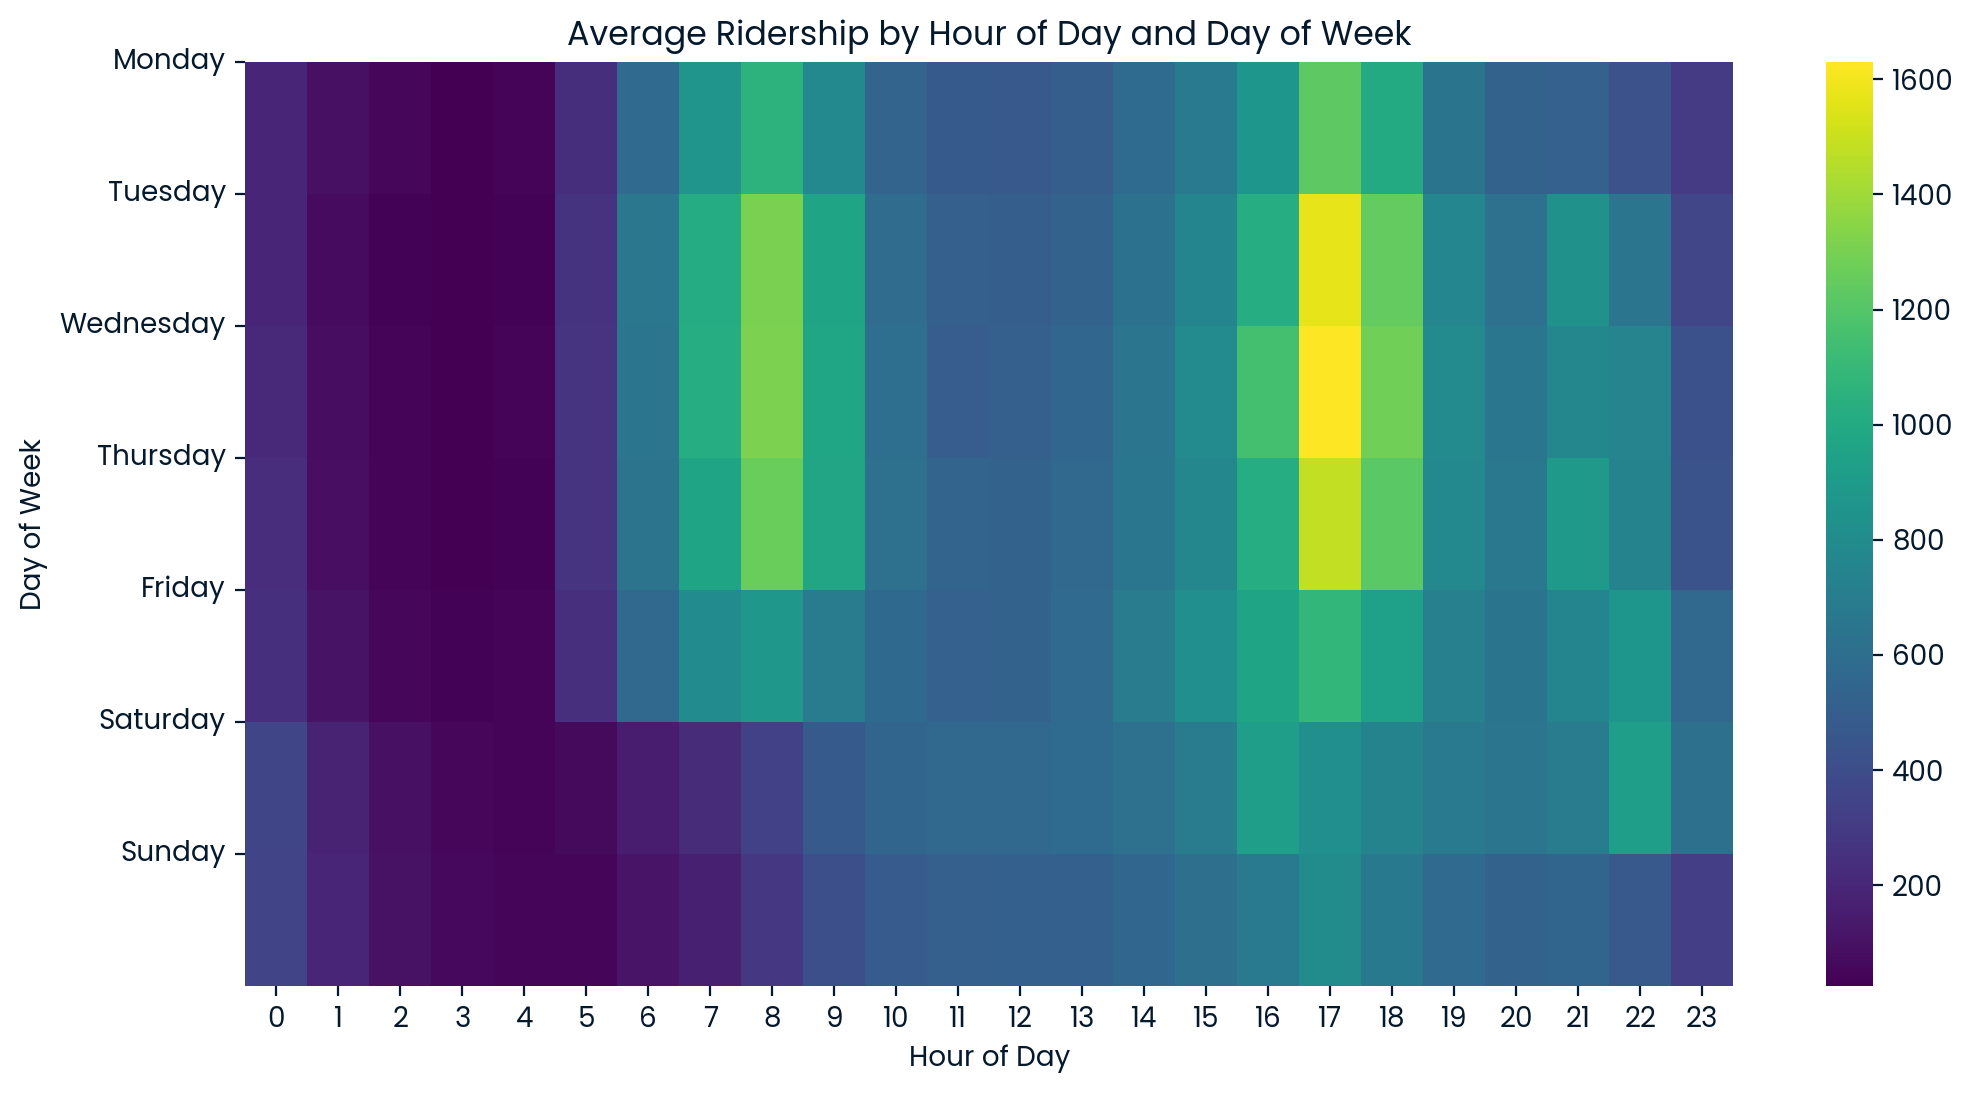

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas

# Convert the 'transit_timestamp' to datetime format
mta_df['transit_timestamp'] = pd.to_datetime(mta_df['transit_timestamp'])

# Extract the hour and day of the week from the timestamp
mta_df['hour'] = mta_df['transit_timestamp'].dt.hour
mta_df['day_of_week'] = mta_df['transit_timestamp'].dt.dayofweek

# Create a pivot table for the heatmap
heatmap_data = mta_df.pivot_table(values='ridership', index='day_of_week', columns='hour', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=False)
plt.title('Average Ridership by Hour of Day and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.show()

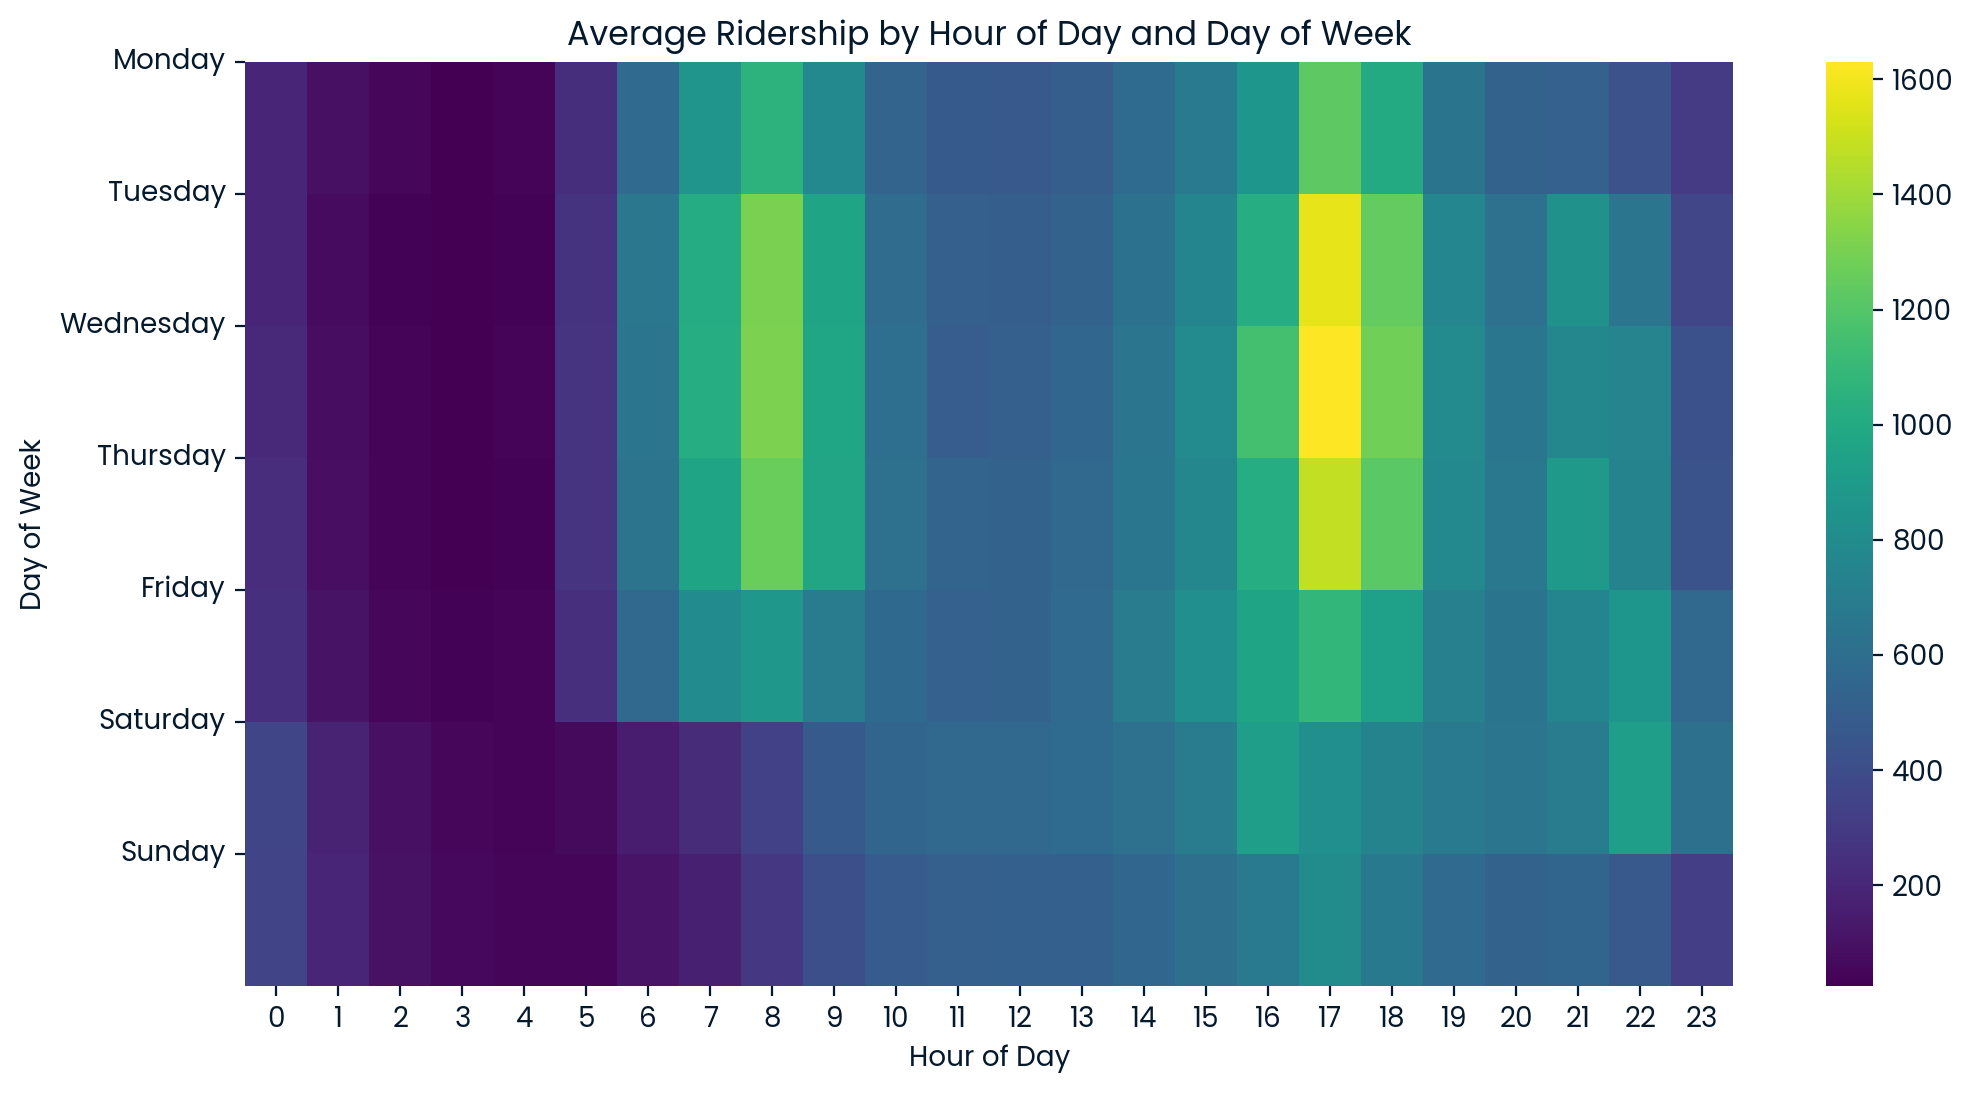

In [15]:
# Plot the heatmap without annotations
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=False)
plt.title('Average Ridership by Hour of Day and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.show()

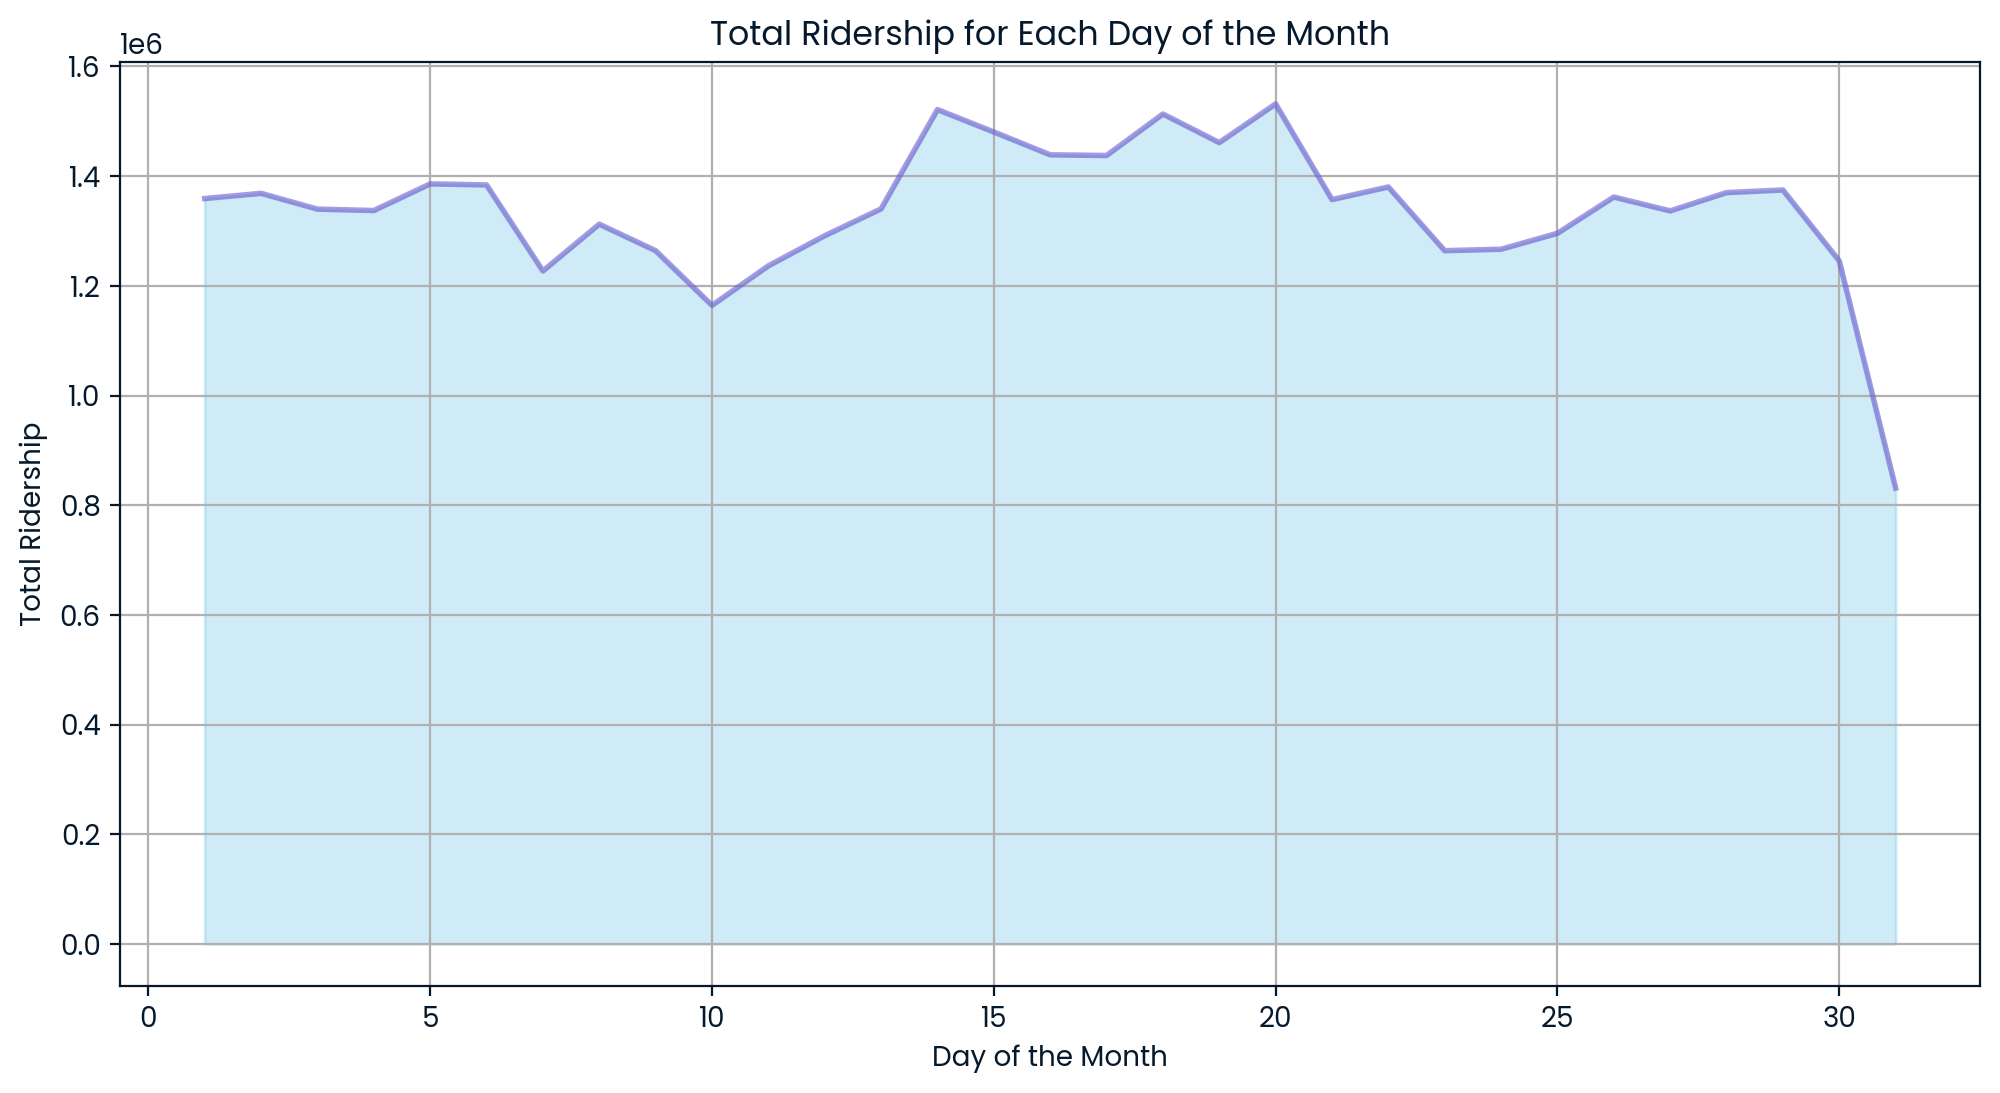

In [16]:
# Extract the day of the month from the timestamp
mta_df['day_of_month'] = mta_df['transit_timestamp'].dt.day

# Group by day of the month and sum the ridership
daily_ridership = mta_df.groupby('day_of_month')['ridership'].sum().reset_index()

# Plot the area chart
plt.figure(figsize=(12, 6))
plt.fill_between(daily_ridership['day_of_month'], daily_ridership['ridership'], color='skyblue', alpha=0.4)
plt.plot(daily_ridership['day_of_month'], daily_ridership['ridership'], color='Slateblue', alpha=0.6, linewidth=2)
plt.title('Total Ridership for Each Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Total Ridership')
plt.grid(True)
plt.show()

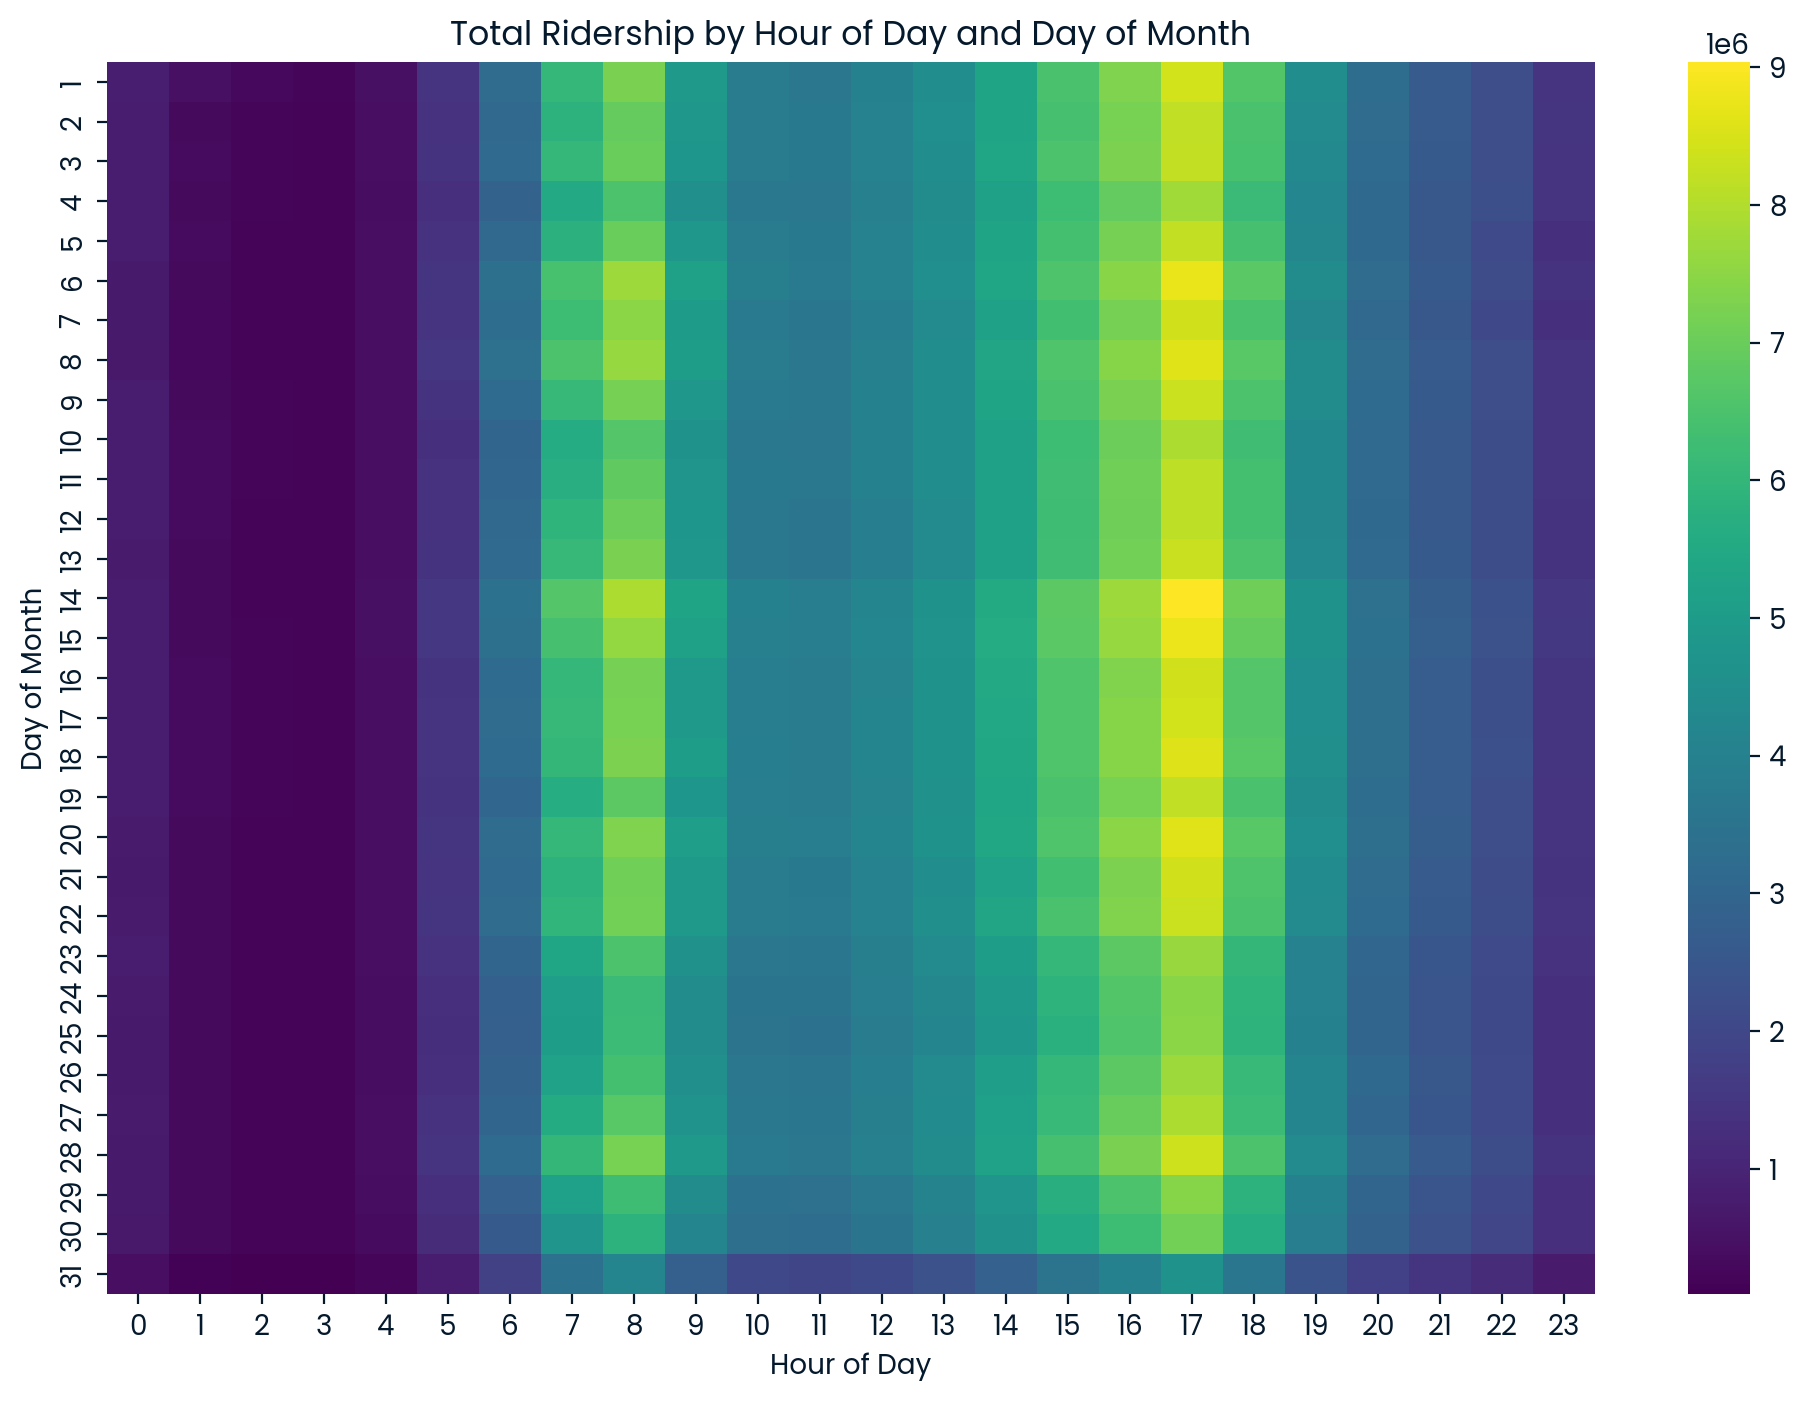

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
mta_df = pd.read_csv('./MTA_Subway_Hourly_Ridership__Beginning_February_2022_20240715.csv')

# Convert the transit_timestamp to datetime
mta_df['transit_timestamp'] = pd.to_datetime(mta_df['transit_timestamp'])

# Extract the day of the month and hour from the timestamp
mta_df['day_of_month'] = mta_df['transit_timestamp'].dt.day
mta_df['hour'] = mta_df['transit_timestamp'].dt.hour

# Group by day of the month and hour, then sum the ridership
heatmap_data = mta_df.groupby(['day_of_month', 'hour'])['ridership'].sum().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=False)
plt.title('Total Ridership by Hour of Day and Day of Month')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Month')
plt.show()

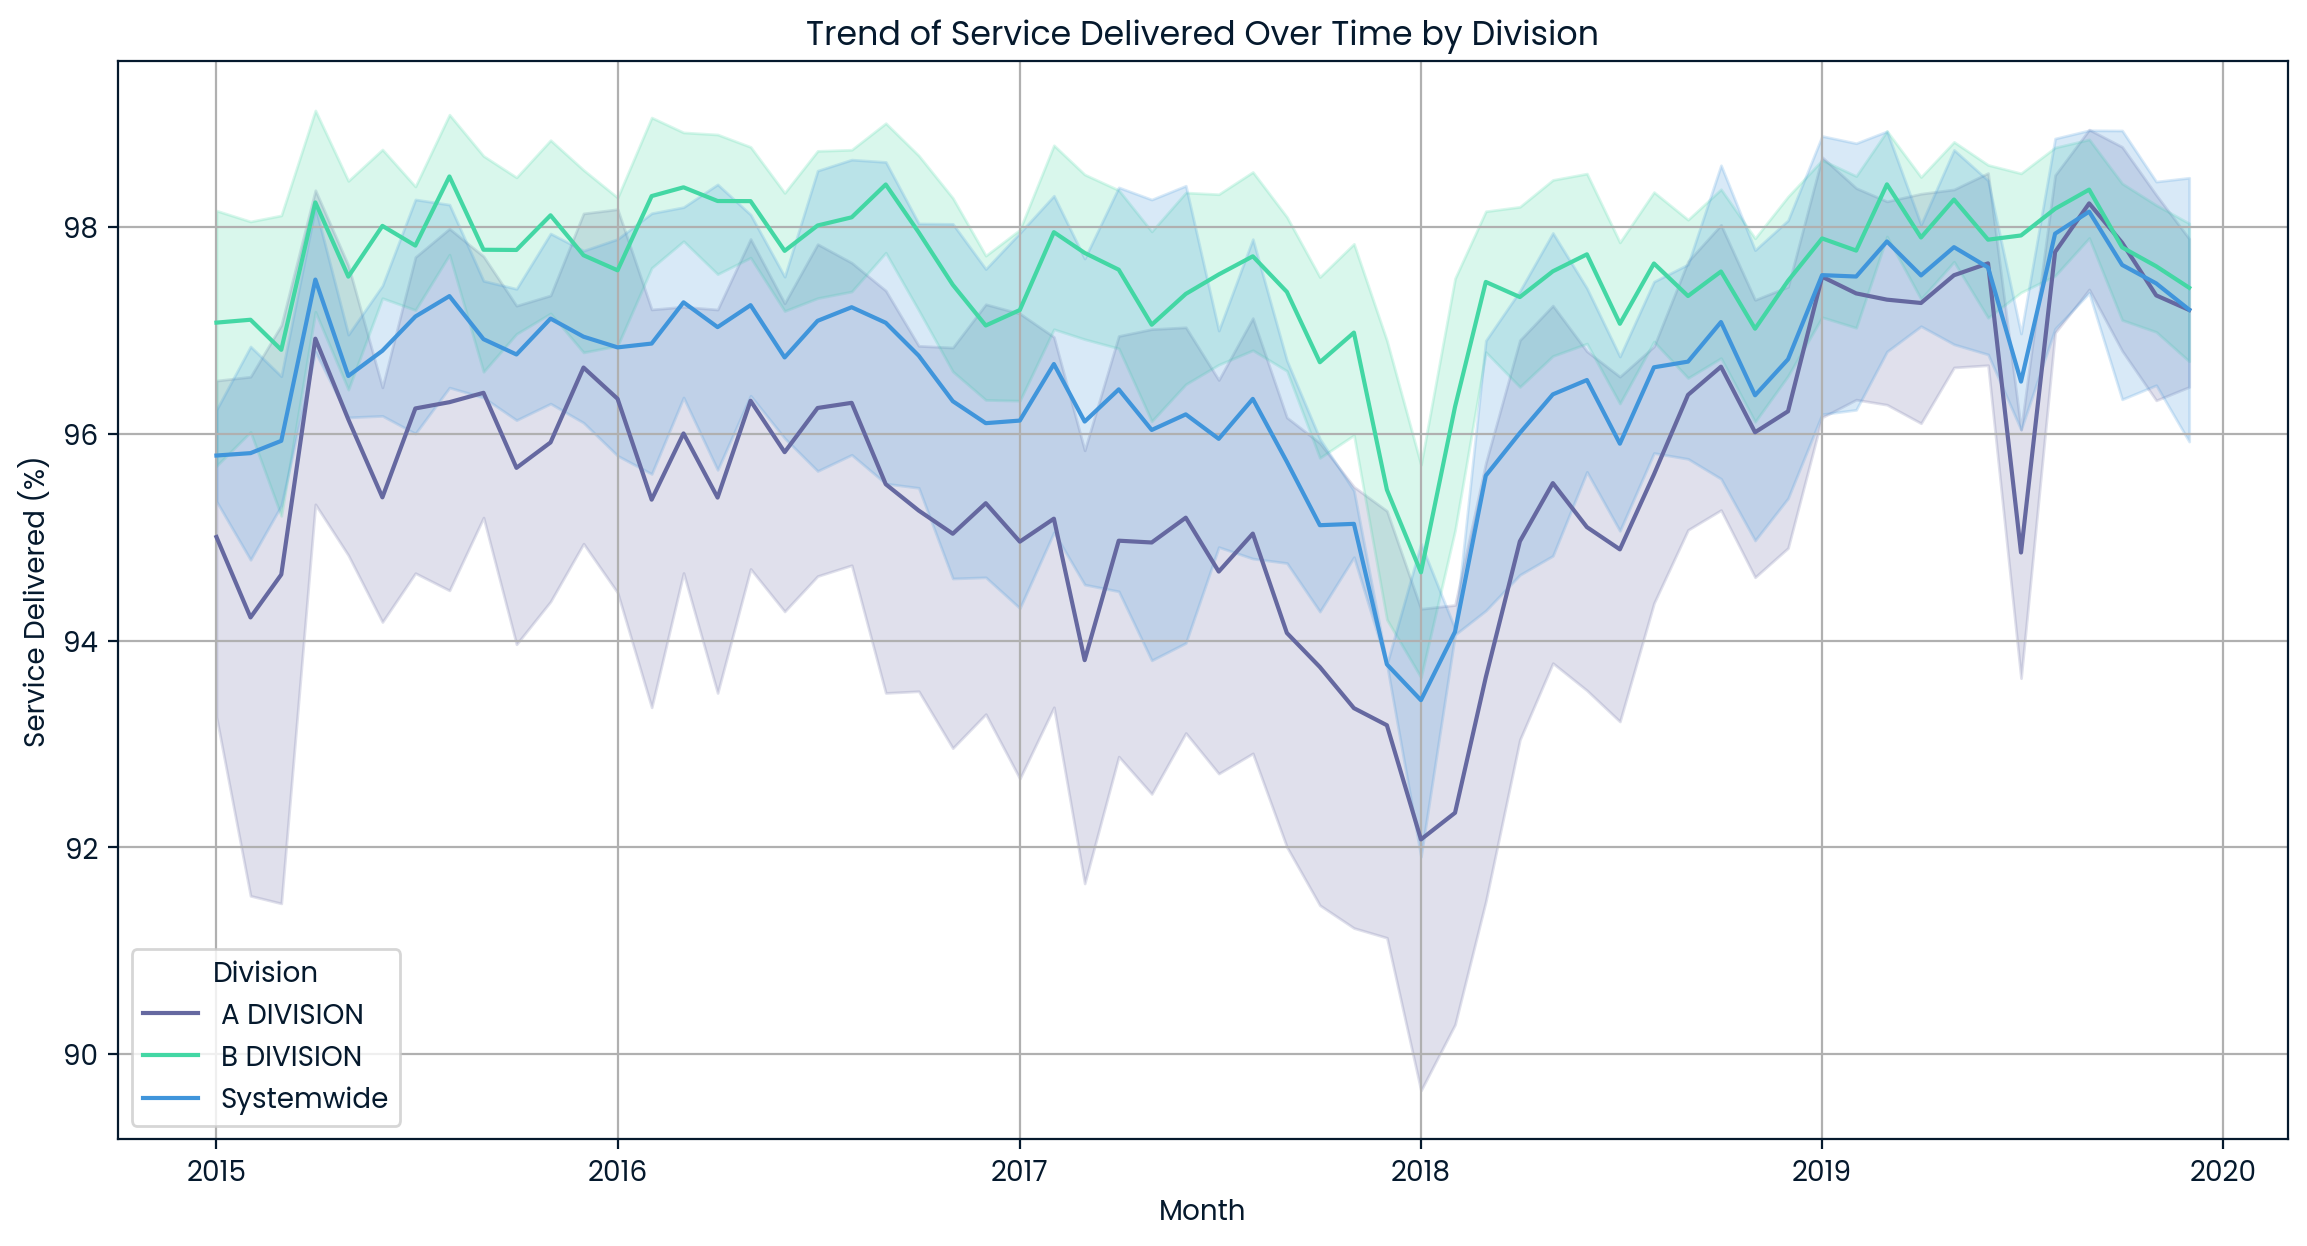

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
service_df = pd.read_csv('./MTA_Subway_Service_Delivered__2015-2019_20240806.csv')

# Convert the month to datetime
service_df['month'] = pd.to_datetime(service_df['month'], format='%Y-%m')

# Calculate the percentage of service delivered
service_df['service_percentage'] = (service_df['num_actual_trains'] / service_df['num_sched_trains']) * 100

# Plot the trend of service delivered over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=service_df, x='month', y='service_percentage', hue='division')
plt.title('Trend of Service Delivered Over Time by Division')
plt.xlabel('Month')
plt.ylabel('Service Delivered (%)')
plt.legend(title='Division')
plt.grid(True)
plt.show()

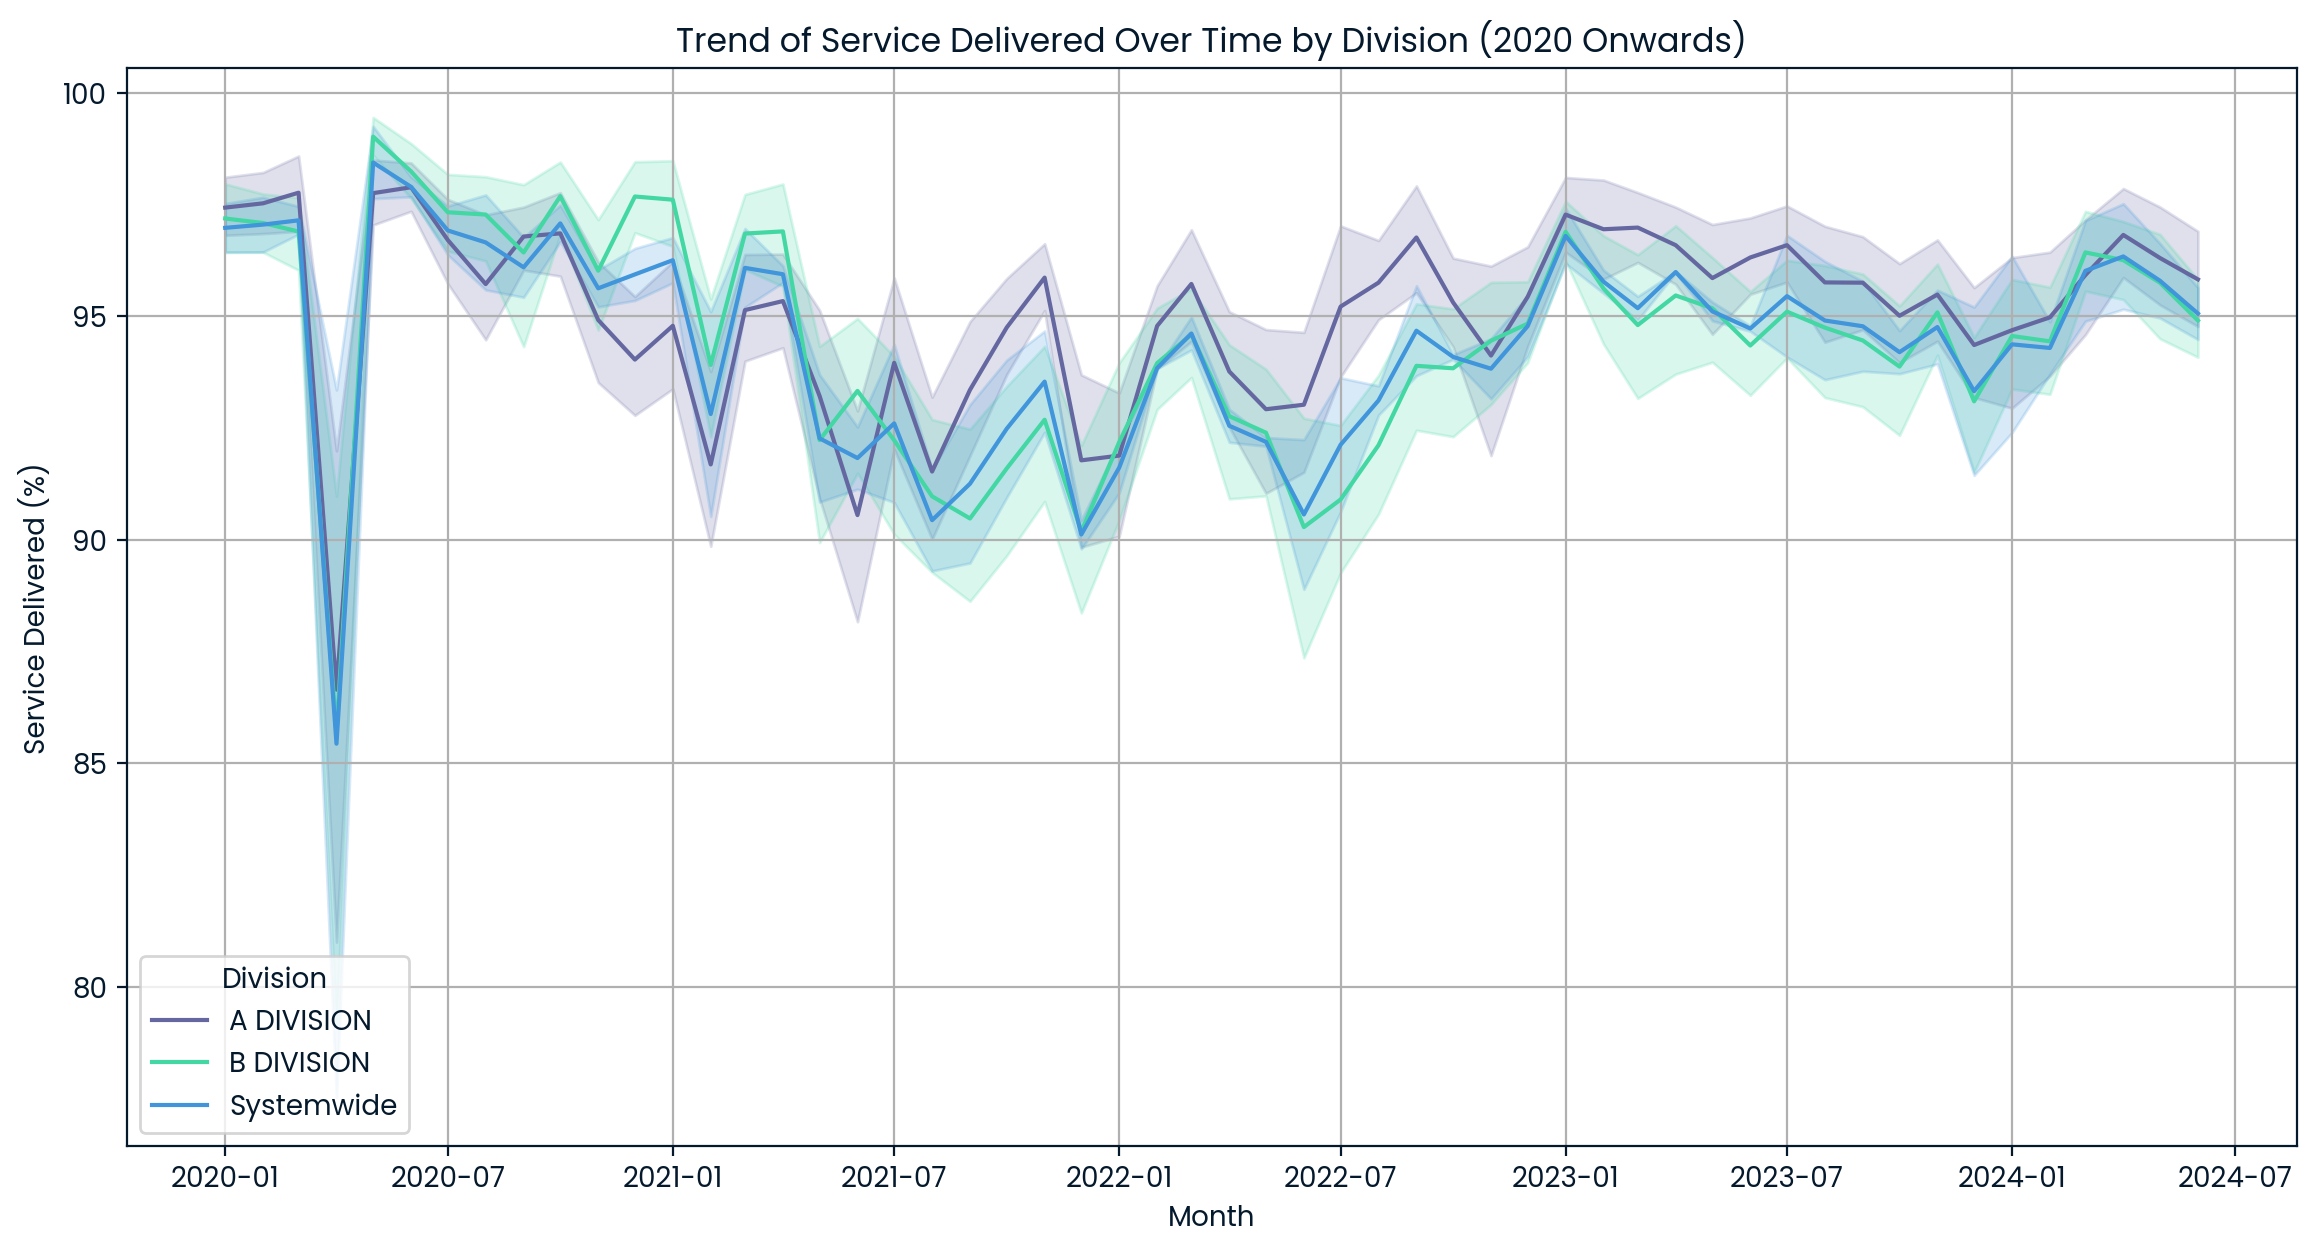

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
service_df_2020 = pd.read_csv('./MTA_Subway_Service_Delivered__Beginning_2020_20240806.csv')

# Convert the month to datetime
service_df_2020['month'] = pd.to_datetime(service_df_2020['month'], format='%Y-%m')

# Calculate the percentage of service delivered
service_df_2020['service_percentage'] = (service_df_2020['num_actual_trains'] / service_df_2020['num_sched_trains']) * 100

# Plot the trend of service delivered over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=service_df_2020, x='month', y='service_percentage', hue='division')
plt.title('Trend of Service Delivered Over Time by Division (2020 Onwards)')
plt.xlabel('Month')
plt.ylabel('Service Delivered (%)')
plt.legend(title='Division')
plt.grid(True)
plt.show()

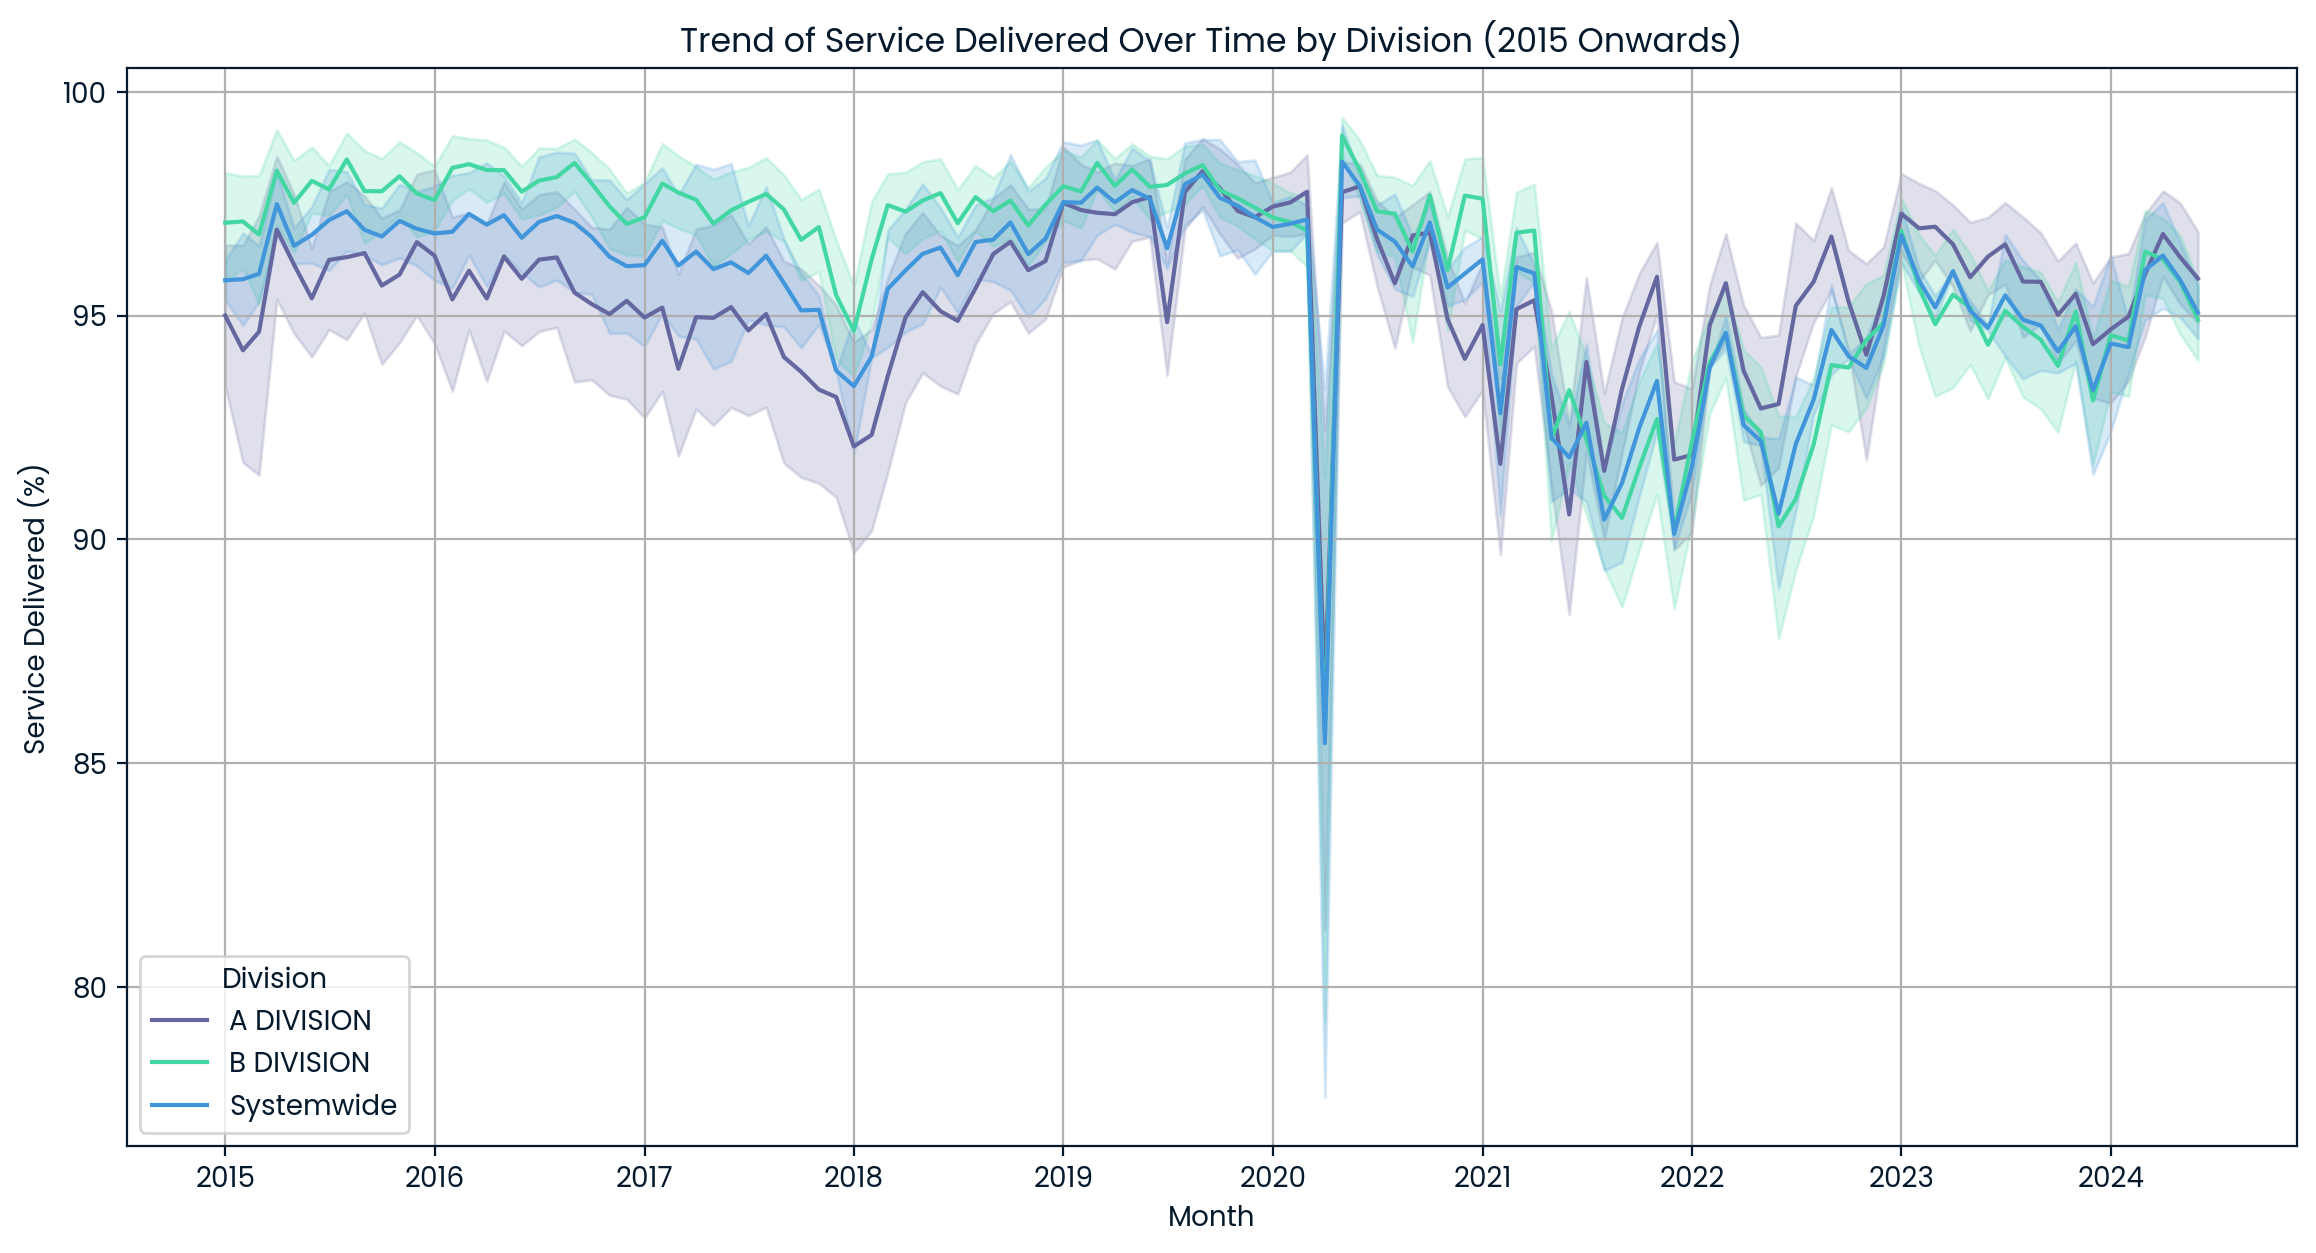

In [20]:
# Load the datasets
service_df_2015_2019 = pd.read_csv('./MTA_Subway_Service_Delivered__2015-2019_20240806.csv')
service_df_2020 = pd.read_csv('./MTA_Subway_Service_Delivered__Beginning_2020_20240806.csv')

# Convert the month to datetime
service_df_2015_2019['month'] = pd.to_datetime(service_df_2015_2019['month'], format='%Y-%m')
service_df_2020['month'] = pd.to_datetime(service_df_2020['month'], format='%Y-%m')

# Calculate the percentage of service delivered
service_df_2015_2019['service_percentage'] = (service_df_2015_2019['num_actual_trains'] / service_df_2015_2019['num_sched_trains']) * 100
service_df_2020['service_percentage'] = (service_df_2020['num_actual_trains'] / service_df_2020['num_sched_trains']) * 100

# Combine the datasets
combined_service_df = pd.concat([service_df_2015_2019, service_df_2020])

# Plot the combined trend of service delivered over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_service_df, x='month', y='service_percentage', hue='division')
plt.title('Trend of Service Delivered Over Time by Division (2015 Onwards)')
plt.xlabel('Month')
plt.ylabel('Service Delivered (%)')
plt.legend(title='Division')
plt.grid(True)
plt.show()

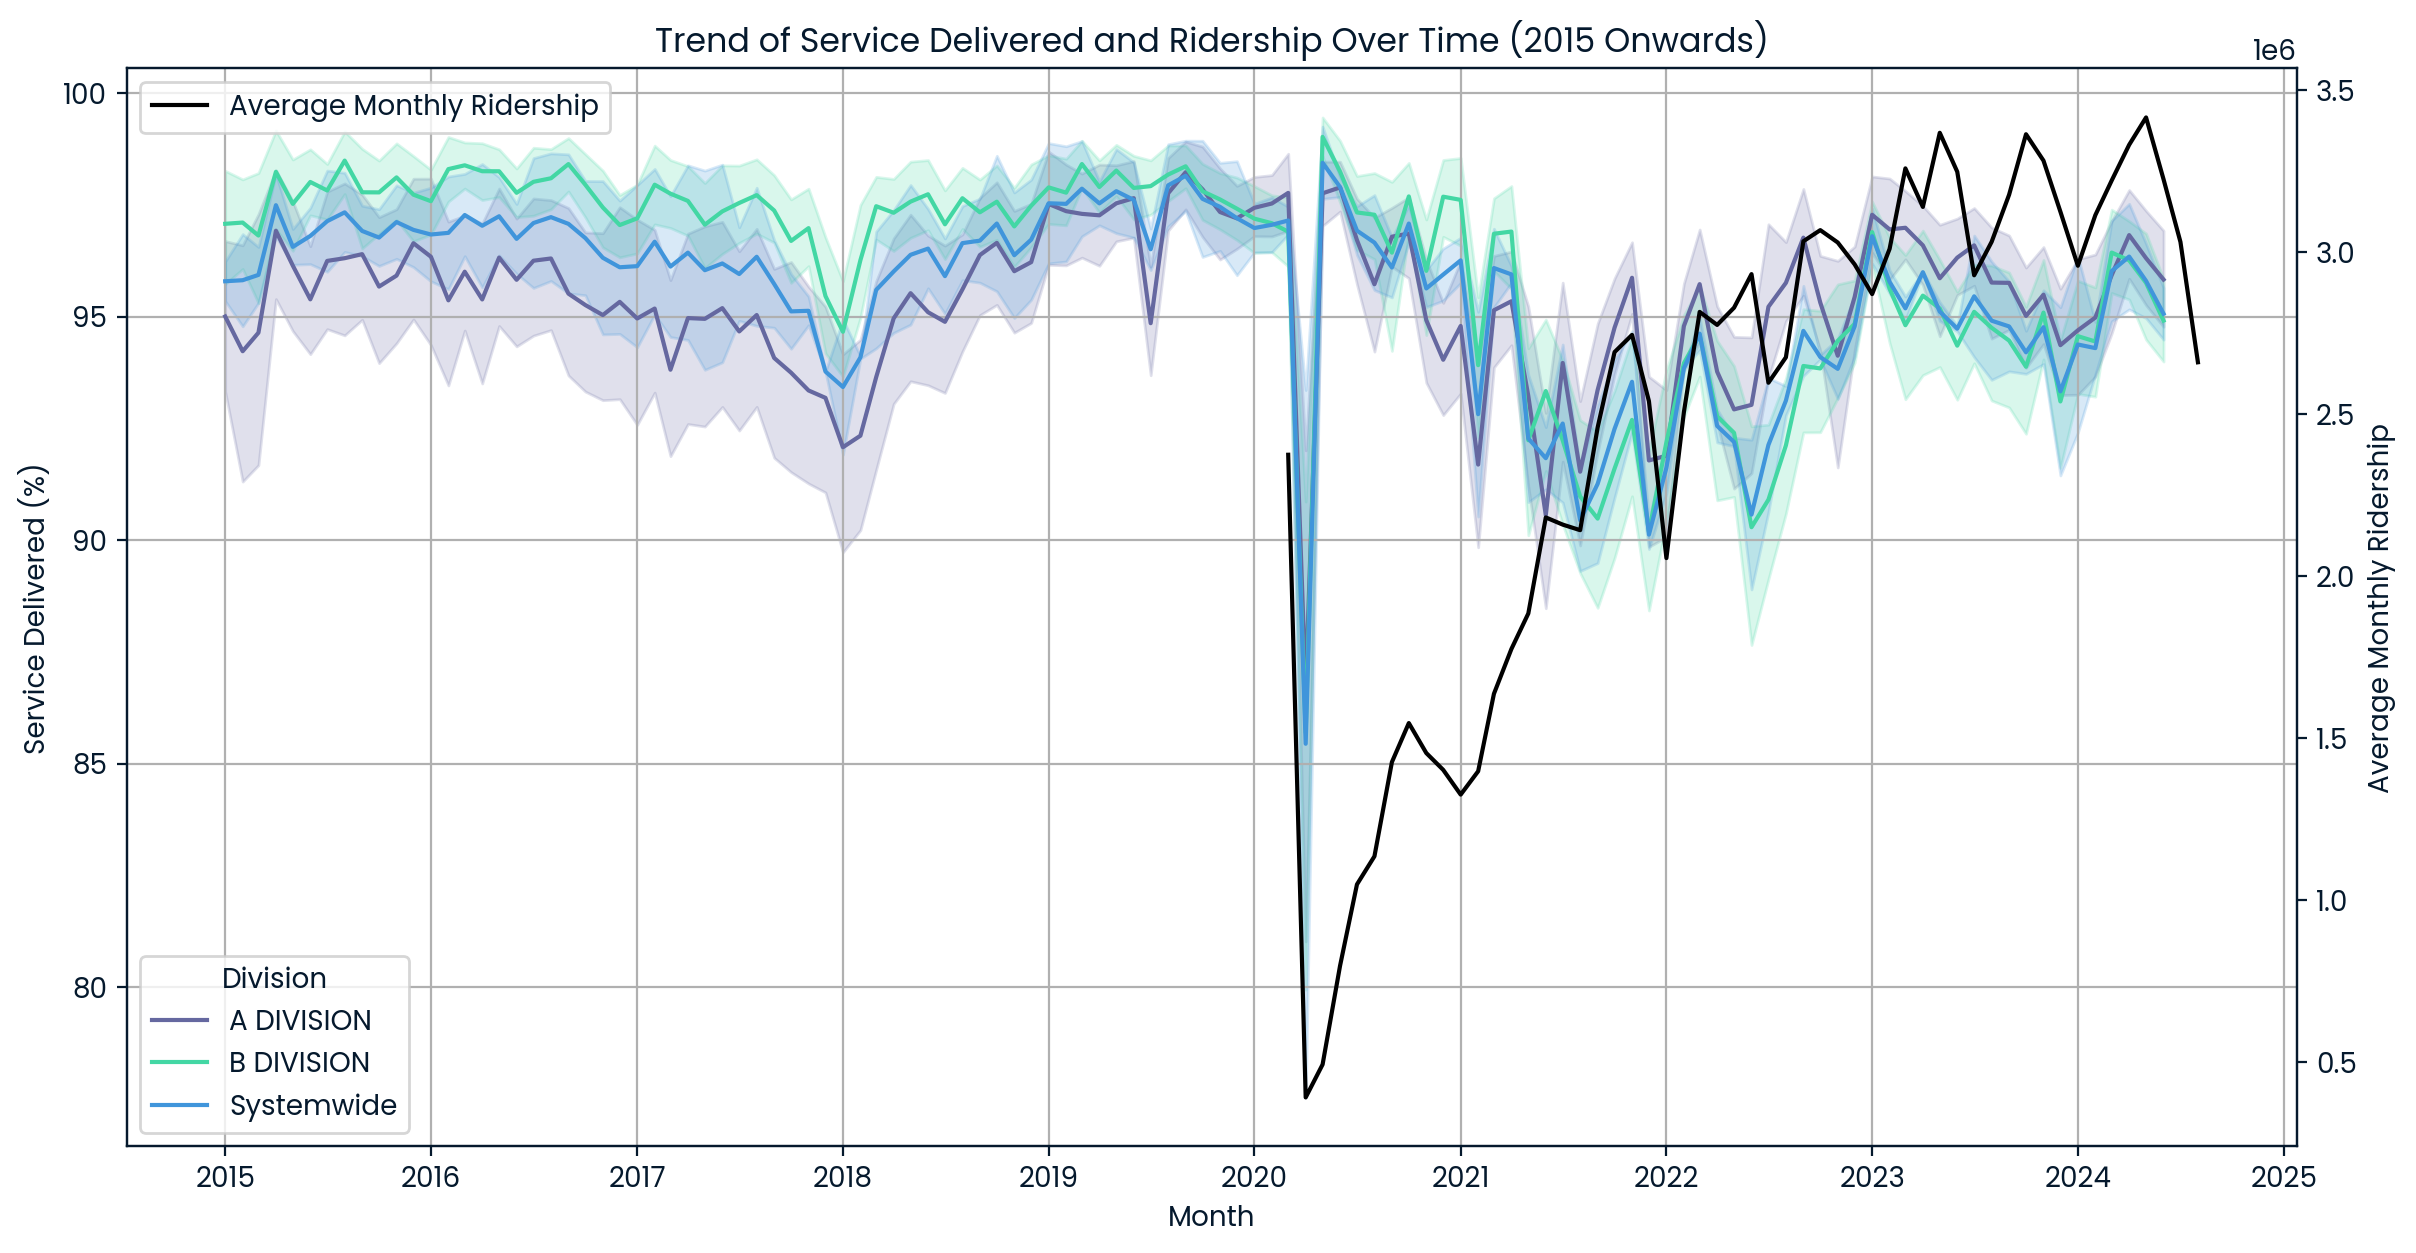

In [21]:
# Load the new dataset
ridership_df = pd.read_csv('./MTA_Daily_Ridership_Data__Beginning_2020_20240806.csv')

# Convert the Date to datetime
ridership_df['Date'] = pd.to_datetime(ridership_df['Date'])

# Calculate the monthly average ridership for subways
ridership_df['month'] = ridership_df['Date'].dt.to_period('M')
monthly_ridership = ridership_df.groupby('month')['Subways: Total Estimated Ridership'].mean().reset_index()
monthly_ridership['month'] = monthly_ridership['month'].dt.to_timestamp()

# Combine the datasets
combined_service_df = pd.concat([service_df_2015_2019, service_df_2020])

# Plot the combined trend of service delivered over time with ridership
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot service delivered
sns.lineplot(data=combined_service_df, x='month', y='service_percentage', hue='division', ax=ax1)
ax1.set_xlabel('Month')
ax1.set_ylabel('Service Delivered (%)')
ax1.set_title('Trend of Service Delivered and Ridership Over Time (2015 Onwards)')
ax1.legend(title='Division')
ax1.grid(True)

# Create a second y-axis for ridership
ax2 = ax1.twinx()
ax2.set_ylabel('Average Monthly Ridership')
sns.lineplot(data=monthly_ridership, x='month', y='Subways: Total Estimated Ridership', color='black', ax=ax2)
ax2.legend(['Average Monthly Ridership'], loc='upper left')

plt.show()

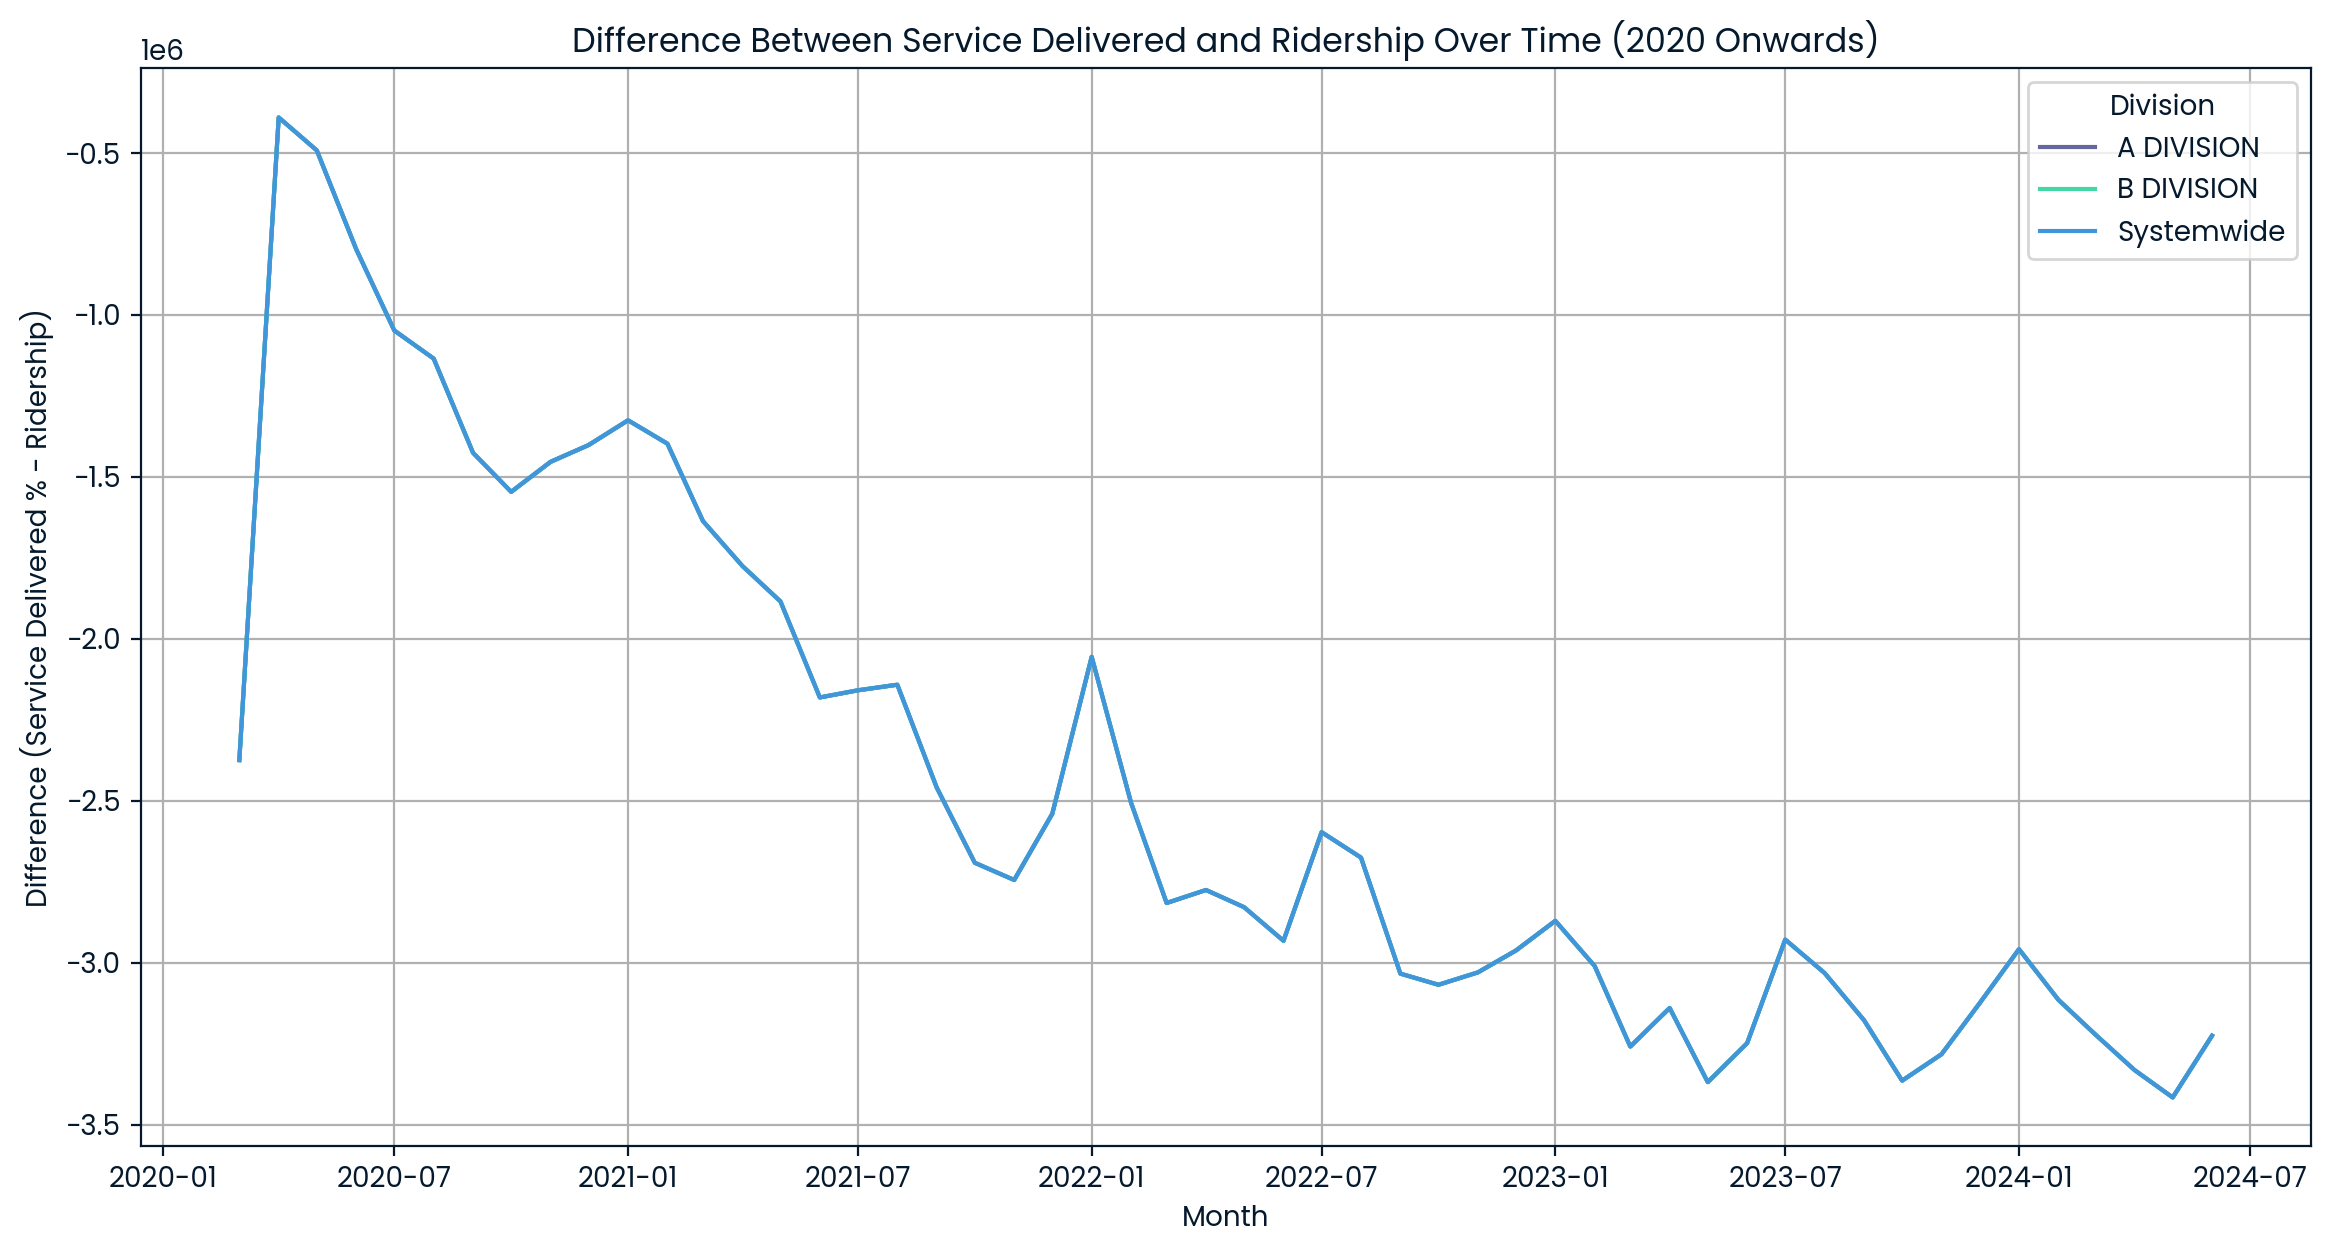

In [22]:
# Filter the combined service data from 2020 onwards
combined_service_df_2020_onwards = combined_service_df[combined_service_df['month'] >= '2020-01-01']

# Merge the service data with ridership data
merged_df = pd.merge(combined_service_df_2020_onwards, monthly_ridership, on='month', how='inner')

# Calculate the difference between service percentage and ridership
merged_df['service_ridership_diff'] = merged_df['service_percentage'] - merged_df['Subways: Total Estimated Ridership']

# Plot the difference over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df, x='month', y='service_ridership_diff', hue='division')
plt.title('Difference Between Service Delivered and Ridership Over Time (2020 Onwards)')
plt.xlabel('Month')
plt.ylabel('Difference (Service Delivered % - Ridership)')
plt.legend(title='Division')
plt.grid(True)
plt.show()

In [23]:
# Load the new dataset
journey_metrics_df = pd.read_csv('./MTA_Subway_Customer_Journey-Focused_Metrics__2015-2019_20240806.csv')

# Convert the month to datetime
journey_metrics_df['month'] = pd.to_datetime(journey_metrics_df['month'])

# Filter the journey metrics data from 2020 onwards
journey_metrics_df_2020_onwards = journey_metrics_df[journey_metrics_df['month'] >= '2020-01-01']

# Merge the journey metrics data with the previously merged data
final_merged_df = pd.merge(merged_df, journey_metrics_df_2020_onwards, on=['month', 'division', 'line'], how='inner')

# Display the first few rows of the final merged dataframe
final_merged_df.head()

,month,division,line,day_type,num_sched_trains,num_actual_trains,service delivered,service_percentage,Subways: Total Estimated Ridership,service_ridership_diff,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance


In [25]:
import plotly.express as px

# Load the new dataset
journey_metrics_df = pd.read_csv('./MTA_Subway_Customer_Journey-Focused_Metrics__2015-2019_20240806.csv')

# Convert the month to datetime
journey_metrics_df['month'] = pd.to_datetime(journey_metrics_df['month'])

# Plotting customer journey time performance over time
fig = px.line(journey_metrics_df, x='month', y='customer journey time performance', color='division',
              title='Customer Journey Time Performance Over Time',
              labels={'month': 'Month', 'customer journey time performance': 'Customer Journey Time Performance'})
fig.update_layout(xaxis_title='Month', yaxis_title='Customer Journey Time Performance', legend_title='Division')
fig.show()

In [4]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('./MTA_Subway_Terminal_On-Time_Performance__2015-2019_20240806.csv')

# Convert the month column to datetime
df['month'] = pd.to_datetime(df['month'])

# Extract year and month for better visualization
df['year'] = df['month'].dt.year
df['month_only'] = df['month'].dt.month

# Plotting Terminal On-Time Performance over time
fig = px.line(df, x='month', y='terminal_on_time_performance', color='division',
              title='Terminal On-Time Performance Over Time',
              labels={'month': 'Month', 'terminal_on_time_performance': 'Terminal On-Time Performance', 'division': 'Division'})
fig.update_layout(xaxis_title='Month', yaxis_title='Terminal On-Time Performance', legend_title='Division')

fig.show()

In [28]:
import pandas as pd
import plotly.express as px

# Load the dataset
journey_metrics_df = pd.read_csv('./MTA_Subway_Customer_Journey-Focused_Metrics__2015-2019_20240806.csv')

# Convert the month to datetime
journey_metrics_df['month'] = pd.to_datetime(journey_metrics_df['month'])

# Remove rows where division is 'systemwide'
journey_metrics_df = journey_metrics_df[journey_metrics_df['division'] != 'systemwide']

# Summary statistics
summary_stats = journey_metrics_df.describe()

# Plotting customer journey time performance over time
fig1 = px.line(journey_metrics_df, x='month', y='customer journey time performance', color='division',
               title='Customer Journey Time Performance Over Time',
               labels={'month': 'Month', 'customer journey time performance': 'Customer Journey Time Performance'})
fig1.update_layout(xaxis_title='Month', yaxis_title='Customer Journey Time Performance', legend_title='Division')

# Plotting additional platform time vs. number of passengers
fig2 = px.scatter(journey_metrics_df, x='num_passengers', y='additional platform time', color='division',
                  title='Additional Platform Time vs. Number of Passengers',
                  labels={'num_passengers': 'Number of Passengers', 'additional platform time': 'Additional Platform Time'})

# Plotting additional train time vs. number of passengers
fig3 = px.scatter(journey_metrics_df, x='num_passengers', y='additional train time', color='division',
                  title='Additional Train Time vs. Number of Passengers',
                  labels={'num_passengers': 'Number of Passengers', 'additional train time': 'Additional Train Time'})

# Plotting percentage of times over five minutes
fig4 = px.line(journey_metrics_df, x='month', y='over_five_mins_perc', color='division',
               title='Percentage of Times Over Five Minutes',
               labels={'month': 'Month', 'over_five_mins_perc': 'Percentage Over Five Minutes'})
fig4.update_layout(xaxis_title='Month', yaxis_title='Percentage Over Five Minutes', legend_title='Division')

# Display the summary statistics and plots
summary_stats, fig1.show(), fig2.show(), fig3.show(), fig4.show()

(       num_passengers  ...  customer journey time performance
 count    2.108000e+03  ...                        2108.000000
 mean     8.147346e+06  ...                           0.832693
 std      2.492306e+07  ...                           0.070854
 min      7.697800e+03  ...                           0.619272
 25%      2.825790e+06  ...                           0.780042
 50%      4.389115e+06  ...                           0.827901
 75%      5.723936e+06  ...                           0.879359
 max      2.212951e+08  ...                           1.000000
 
 [8 rows x 8 columns],
 None,
 None,
 None,
 None)

In [29]:
import pandas as pd

# Load the dataset
journey_metrics_df = pd.read_csv('./MTA_Subway_Customer_Journey-Focused_Metrics__2015-2019_20240806.csv')

# Remove rows where division is 'systemwide'
newdf = journey_metrics_df[journey_metrics_df['division'] != 'systemwide']

# Display the first few rows of the new dataframe
newdf.head()

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2015-01,A DIVISION,1,peak,5170116.8,1.371438,0.825562,7090492.655,4268251.636,580364.0,0.112254,0.887746
1,2015-01,A DIVISION,1,offpeak,5442987.9,0.913304,0.667314,4971100.611,3632181.629,488584.7,0.089764,0.910236
2,2015-01,A DIVISION,2,offpeak,4647297.0,1.084853,1.258279,5041633.115,5847597.552,812798.4,0.174897,0.825103
3,2015-01,A DIVISION,2,peak,4719248.8,1.099684,1.419205,5189680.783,6697579.942,839705.4,0.177932,0.822068
4,2015-01,A DIVISION,3,offpeak,3602657.1,0.686007,0.856340,2471447.105,3085097.627,368404.9,0.102259,0.897741


In [35]:
import pandas as pd
import plotly.express as px

# Load the dataset
journey_metrics_df = pd.read_csv('./MTA_Subway_1Customer_Journey-Focused_Metrics__2015-2019_20240806.csv')

# Convert the month to datetime
journey_metrics_df['month'] = pd.to_datetime(journey_metrics_df['month'])

# Filter out 'systemwide' from the division column
filtered_df = journey_metrics_df[journey_metrics_df['division'] != 'systemwide']

# Summary statistics
summary_stats = filtered_df.describe()

# Group by division and calculate mean for key metrics
division_means = filtered_df.groupby('division').mean()[['num_passengers', 'additional platform time', 'additional train time', 'over_five_mins_perc', 'customer journey time performance']]

# Plotting customer journey time performance over time
fig1 = px.line(filtered_df, x='month', y='customer journey time performance', color='division',
               title='Customer Journey Time Performance Over Time',
               labels={'month': 'Month', 'customer journey time performance': 'Customer Journey Time Performance'})
fig1.update_layout(xaxis_title='Month', yaxis_title='Customer Journey Time Performance', legend_title='Division')

# Plotting additional platform time vs. number of passengers
fig2 = px.scatter(filtered_df, x='num_passengers', y='additional platform time', color='division',
                  title='Additional Platform Time vs. Number of Passengers',
                  labels={'num_passengers': 'Number of Passengers', 'additional platform time': 'Additional Platform Time'})

# Plotting additional train time vs. number of passengers
fig3 = px.scatter(filtered_df, x='num_passengers', y='additional train time', color='division',
                  title='Additional Train Time vs. Number of Passengers',
                  labels={'num_passengers': 'Number of Passengers', 'additional train time': 'Additional Train Time'})

# Plotting percentage of times over five minutes
fig4 = px.line(filtered_df, x='month', y='over_five_mins_perc', color='division',
               title='Percentage of Times Over Five Minutes',
               labels={'month': 'Month', 'over_five_mins_perc': 'Percentage Over Five Minutes'})
fig4.update_layout(xaxis_title='Month', yaxis_title='Percentage Over Five Minutes', legend_title='Division')

# Display the summary statistics, division means, and plots
summary_stats, division_means, fig1.show(), fig2.show(), fig3.show(), fig4.show()

(       num_passengers  ...  customer journey time performance
 count    2.048000e+03  ...                        2048.000000
 mean     4.193019e+06  ...                           0.832966
 std      2.078977e+06  ...                           0.071789
 min      7.697800e+03  ...                           0.619272
 25%      2.749670e+06  ...                           0.779055
 50%      4.327750e+06  ...                           0.828030
 75%      5.639599e+06  ...                           0.881025
 max      1.018307e+07  ...                           1.000000
 
 [8 rows x 8 columns],
             num_passengers  ...  customer journey time performance
 division                    ...                                   
 A DIVISION    5.082320e+06  ...                           0.852102
 B DIVISION    3.408341e+06  ...                           0.816082
 
 [2 rows x 5 columns],
 None,
 None,
 None,
 None)

In [ ]:
import pandas as pd

df1000 = pd.read_csv('MTA_Subway_Hourly_Ridership__Beginning_February_2022_20240614.csv')
df1000

Error: Failed to execute this cell, please try again.